## CLARA multicore scaling

In [1]:
import json
from io import StringIO

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 0.4
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['figure.autolayout'] = True

### Parameters

In [2]:
params = {
    'date': '2022-07-19',
    'host': 'nid005296',
    'chain': ['MAGFIELDS', 'FTCAL', 'FTHODO', 'FTEB', 'DCCR', 'MLTD', 'DCHAI', 'FTOFHB', 'EC', 'CVTFP', 'CTOF', 'CND', 'BAND', 'HTCC', 'LTCC', 'EBHB', 'DCTB', 'FMT', 'CVTSP', 'FTOFTB', 'EBTB', 'RICH', 'RTPC'],
    'input_file': './clas_006302.evio.00005-00009.hipo',
    'output_file': '/pscratch/sd/t/tylern/clas12/recon/test.hipo',
    'n_events': '2000',
    'jvm_options': ''
}

print(json.dumps(params, indent=4))

{
    "date": "2022-07-19",
    "host": "nid005296",
    "chain": [
        "MAGFIELDS",
        "FTCAL",
        "FTHODO",
        "FTEB",
        "DCCR",
        "MLTD",
        "DCHAI",
        "FTOFHB",
        "EC",
        "CVTFP",
        "CTOF",
        "CND",
        "BAND",
        "HTCC",
        "LTCC",
        "EBHB",
        "DCTB",
        "FMT",
        "CVTSP",
        "FTOFTB",
        "EBTB",
        "RICH",
        "RTPC"
    ],
    "input_file": "./clas_006302.evio.00005-00009.hipo",
    "output_file": "/pscratch/sd/t/tylern/clas12/recon/test.hipo",
    "n_events": "2000",
    "jvm_options": ""
}


### Benchmark

In [3]:
benchmark_data = """\
Cores,READER,MAGFIELDS,FTCAL,FTHODO,FTEB,DCCR,MLTD,DCHAI,FTOFHB,EC,CVTFP,CTOF,CND,BAND,HTCC,LTCC,EBHB,DCTB,FMT,CVTSP,FTOFTB,EBTB,RICH,RTPC,WRITER,TOTAL,Orchestrator
1,0.08,0.02,0.08,0.12,0.04,21.27,14.05,45.42,1.22,0.81,147.35,1.02,0.43,0.03,0.05,0.04,0.38,146.82,0.02,15.13,1.45,0.92,0.32,0.03,3.54,400.63,409.74
2,0.07,0.01,0.07,0.11,0.04,21.17,13.38,45.51,1.26,0.81,148.99,0.95,0.41,0.02,0.04,0.03,0.35,147.16,0.02,15.11,1.37,0.90,0.32,0.02,3.54,401.64,205.47
4,0.06,0.01,0.06,0.11,0.04,20.82,12.49,46.29,1.33,0.82,151.67,0.77,0.38,0.02,0.04,0.03,0.37,148.48,0.02,15.26,1.31,0.78,0.28,0.02,3.54,404.97,103.72
6,0.05,0.01,0.06,0.11,0.03,20.84,12.10,47.62,1.25,0.80,155.90,0.79,0.40,0.02,0.03,0.03,0.35,151.70,0.02,15.46,1.33,0.71,0.25,0.02,3.59,413.45,70.67
8,0.05,0.01,0.05,0.12,0.03,20.97,12.16,48.45,1.20,0.75,159.64,0.66,0.39,0.02,0.03,0.03,0.36,154.97,0.02,15.76,1.26,0.69,0.25,0.02,3.65,421.53,54.20
10,0.07,0.01,0.08,0.15,0.04,32.20,24.60,74.03,1.93,1.24,231.20,1.28,0.64,0.02,0.03,0.04,0.50,219.62,0.02,22.55,1.80,0.99,0.33,0.01,3.85,617.24,63.20
12,0.08,0.01,0.10,0.20,0.04,35.75,26.64,80.37,2.44,1.23,255.39,1.74,0.58,0.02,0.05,0.04,0.55,240.17,0.02,24.25,2.22,1.10,0.35,0.01,3.89,677.26,57.80
14,0.08,0.01,0.09,0.20,0.06,37.07,28.20,82.77,2.21,1.37,260.04,1.82,0.66,0.03,0.05,0.03,0.61,244.51,0.03,25.13,2.27,0.97,0.32,0.02,3.96,692.53,50.89
16,0.07,0.01,0.11,0.23,0.04,38.90,28.10,84.04,2.35,1.17,262.59,1.98,0.65,0.03,0.03,0.03,0.61,250.14,0.02,25.91,2.54,1.21,0.37,0.01,3.99,705.14,45.53
18,0.08,0.02,0.09,0.18,0.05,38.96,30.24,85.61,2.06,1.33,276.50,1.71,0.54,0.04,0.04,0.03,0.45,257.15,0.02,26.41,2.40,1.03,0.35,0.02,3.97,729.29,42.01
20,0.08,0.02,0.09,0.17,0.04,39.32,29.57,84.90,2.35,1.23,273.96,1.78,0.52,0.03,0.04,0.02,0.57,254.11,0.03,26.31,2.47,1.09,0.36,0.01,4.03,723.11,37.75
22,0.09,0.01,0.10,0.19,0.02,39.71,29.34,85.54,2.27,1.26,277.98,1.65,0.64,0.02,0.04,0.04,0.49,253.80,0.02,27.19,2.43,1.08,0.45,0.02,4.03,728.44,34.72
24,0.07,0.01,0.09,0.18,0.03,41.20,30.44,85.60,2.21,1.16,281.62,1.61,0.53,0.02,0.02,0.02,0.49,259.32,0.02,27.62,2.10,1.08,0.36,0.01,4.00,739.84,32.52
26,0.08,0.01,0.11,0.17,0.03,40.90,30.52,87.80,2.33,1.24,287.25,1.96,0.67,0.02,0.04,0.03,0.53,255.44,0.02,26.60,2.44,1.09,0.43,0.01,4.01,743.75,30.28
28,0.08,0.02,0.09,0.19,0.03,38.91,31.09,85.38,1.81,1.13,276.51,1.70,0.48,0.02,0.05,0.03,0.49,249.71,0.02,25.05,1.88,1.05,0.42,0.02,4.02,720.17,27.49
30,0.07,0.01,0.08,0.15,0.03,40.85,32.49,87.31,2.17,1.15,277.82,1.65,0.54,0.02,0.05,0.02,0.45,251.23,0.02,26.18,2.31,1.13,0.37,0.02,4.05,730.17,26.17
32,0.08,0.02,0.09,0.19,0.04,41.15,33.68,89.31,2.28,1.30,287.36,1.68,0.59,0.02,0.04,0.03,0.56,259.14,0.02,26.64,2.36,1.14,0.39,0.02,4.06,752.18,25.34"""

df = pd.read_csv(StringIO(benchmark_data))

In [4]:
df['EvRate'] = 1000 / df['Orchestrator']

pd.options.display.max_columns = None
pd.options.display.precision = 2
df

,Cores,READER,MAGFIELDS,FTCAL,FTHODO,FTEB,DCCR,MLTD,DCHAI,FTOFHB,EC,CVTFP,CTOF,CND,BAND,HTCC,LTCC,EBHB,DCTB,FMT,CVTSP,FTOFTB,EBTB,RICH,RTPC,WRITER,TOTAL,Orchestrator,EvRate
0,1,0.08,0.02,0.08,0.12,0.04,21.27,14.05,45.42,1.22,0.81,147.35,1.02,0.43,0.03,0.05,0.04,0.38,146.82,0.02,15.13,1.45,0.92,0.32,0.03,3.54,400.63,409.74,2.44
1,2,0.07,0.01,0.07,0.11,0.04,21.17,13.38,45.51,1.26,0.81,148.99,0.95,0.41,0.02,0.04,0.03,0.35,147.16,0.02,15.11,1.37,0.90,0.32,0.02,3.54,401.64,205.47,4.87
2,4,0.06,0.01,0.06,0.11,0.04,20.82,12.49,46.29,1.33,0.82,151.67,0.77,0.38,0.02,0.04,0.03,0.37,148.48,0.02,15.26,1.31,0.78,0.28,0.02,3.54,404.97,103.72,9.64
3,6,0.05,0.01,0.06,0.11,0.03,20.84,12.10,47.62,1.25,0.80,155.90,0.79,0.40,0.02,0.03,0.03,0.35,151.70,0.02,15.46,1.33,0.71,0.25,0.02,3.59,413.45,70.67,14.15
4,8,0.05,0.01,0.05,0.12,0.03,20.97,12.16,48.45,1.20,0.75,159.64,0.66,0.39,0.02,0.03,0.03,0.36,154.97,0.02,15.76,1.26,0.69,0.25,0.02,3.65,421.53,54.20,18.45
5,10,0.07,0.01,0.08,0.15,0.04,32.20,24.60,74.03,1.93,1.24,231.20,1.28,0.64,0.02,0.03,0.04,0.50,219.62,0.02,22.55,1.80,0.99,0.33,0.01,3.85,617.24,63.20,15.82
6,12,0.08,0.01,0.10,0.20,0.04,35.75,26.64,80.37,2.44,1.23,255.39,1.74,0.58,0.02,0.05,0.04,0.55,240.17,0.02,24.25,2.22,1.10,0.35,0.01,3.89,677.26,57.80,17.30
7,14,0.08,0.01,0.09,0.20,0.06,37.07,28.20,82.77,2.21,1.37,260.04,1.82,0.66,0.03,0.05,0.03,0.61,244.51,0.03,25.13,2.27,0.97,0.32,0.02,3.96,692.53,50.89,19.65
8,16,0.07,0.01,0.11,0.23,0.04,38.90,28.10,84.04,2.35,1.17,262.59,1.98,0.65,0.03,0.03,0.03,0.61,250.14,0.02,25.91,2.54,1.21,0.37,0.01,3.99,705.14,45.53,21.96
9,18,0.08,0.02,0.09,0.18,0.05,38.96,30.24,85.61,2.06,1.33,276.50,1.71,0.54,0.04,0.04,0.03,0.45,257.15,0.02,26.41,2.40,1.03,0.35,0.02,3.97,729.29,42.01,23.80


### Plots

In [5]:
title = 'Scaling test - CLARA 4.3-SNAPSHOT - nid005296 - 2000 events'
xlim = (0, 34)
xticks = range(0, 34, 4)

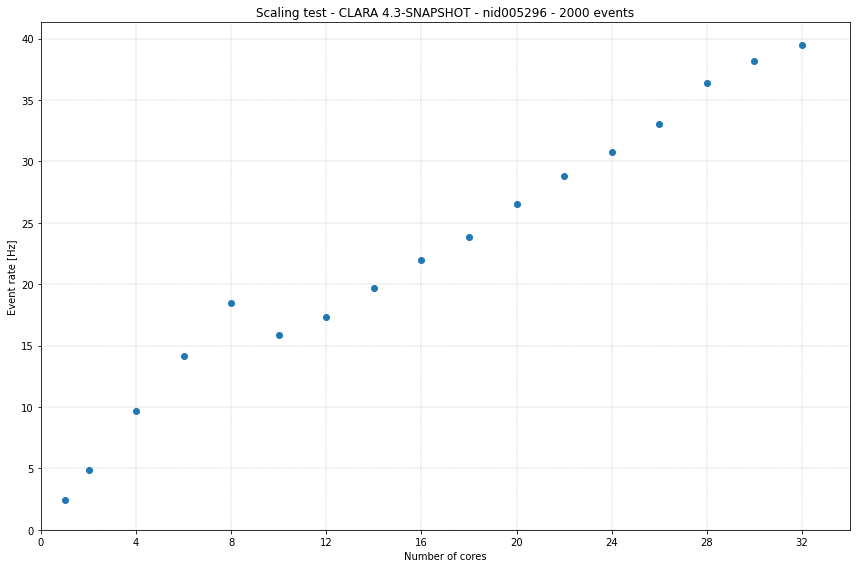

In [6]:
ax = df.plot(x='Cores', y='EvRate', style='o', legend=False, xlim=xlim, xticks=xticks)
ax.set_title(title)
ax.set_ylim(bottom=0)
ax.set_xlabel('Number of cores')
ax.set_ylabel('Event rate [Hz]');

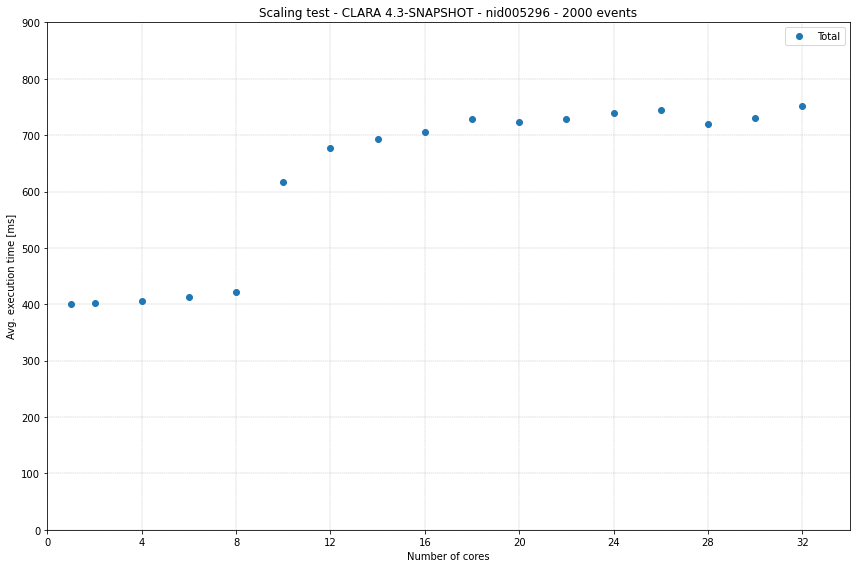

In [7]:
_, ax = plt.subplots()

df.plot(x='Cores', y='TOTAL', ax=ax, label='Total', style='o')

ax.set_title(title)
ax.set_xticks(xticks)
ax.set_xlim(xlim)
ax.set_ylim(0, 900)
ax.set_xlabel('Number of cores')
ax.set_ylabel('Avg. execution time [ms]')
ax.legend();